In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb

# 1. Baseline Code

In [2]:
(train_data, train_labels), _ = imdb.load_data(num_words = 10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

train_data = vectorize_sequences(train_data)

In [4]:
model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])
history_original = model.fit(train_data, train_labels, epochs = 20, batch_size = 512, validation_split =0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.6900 - loss: 0.6021 - val_accuracy: 0.8712 - val_loss: 0.3881
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.8871 - loss: 0.3439 - val_accuracy: 0.8808 - val_loss: 0.3157
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.9171 - loss: 0.2504 - val_accuracy: 0.8811 - val_loss: 0.2934
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.9373 - loss: 0.1937 - val_accuracy: 0.8934 - val_loss: 0.2726
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.9504 - loss: 0.1593 - val_accuracy: 0.8788 - val_loss: 0.2974
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9551 - loss: 0.1416 - val_accuracy: 0.8882 - val_loss: 0.2857
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9586 - loss: 0.1311 - val_accuracy: 0.8773 - val_loss: 0.3244
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9705 - loss: 0.1031 - val_accuracy: 0.8848 - v

In [5]:
sample_pred = model.predict(train_data[:100])
sample_pred.shape

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


(100, 1)

# 2. 사용자 지정 평가 지표 - f1 score

In [6]:
# precision = (TP)/(TP+FP)
# Recall = (TP)/(TP+FN)
# F1 = 2*(precision * recall)/(precision + recall)

class F1Score(keras.metrics.Metric):

    def __init__(self, name = "f1_score", **kwargs):
        super().__init__(name = name, **kwargs)
        self.tp = self.add_weight(name = "true_positives", initializer = "zeros")
        self.fp = self.add_weight(name = "false_positives", initializer = "zeros")
        self.fn = self.add_weight(name = "false_negatives", initializer = "zeros")

    def update_state(self, y_true, y_pred, sample_weight = None):
        y_pred = tf.round(y_pred)
        y_true = tf.cast(y_true, tf.float32)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1-y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)

    def result(self):
        recall = self.tp / (self.tp + self.fn)
        precision = self.tp / (self.tp + self.fp)
        f1_score = 2 * (recall * precision)/(recall + precision)
        return f1_score

    def reset_state(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

In [7]:
model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy", F1Score()])
history = model.fit(train_data, train_labels, epochs = 20, batch_size = 512, validation_split =0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.7006 - f1_score: 0.6678 - loss: 0.6065 - val_accuracy: 0.8713 - val_f1_score: 0.6648 - val_loss: 0.4020
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8902 - f1_score: 0.6698 - loss: 0.3513 - val_accuracy: 0.8764 - val_f1_score: 0.6647 - val_loss: 0.3276
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9136 - f1_score: 0.6691 - loss: 0.2599 - val_accuracy: 0.8912 - val_f1_score: 0.6651 - val_loss: 0.2822
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9348 - f1_score: 0.6784 - loss: 0.2049 - val_accuracy: 0.8849 - val_f1_score: 0.6652 - val_loss: 0.2849
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9445 - f1_score: 0.6655 - loss: 0.1691 - val_accuracy: 0.8902 - val_f1_score: 0.6650 - val_loss: 0.2763
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9578 - f1_score: 0.6697 - loss: 0.1400 - val_accuracy: 0.8876 - val_f1_score: 0.6650 - val

In [8]:
len(history.history['f1_score'])

20

In [9]:
history.history.keys()

dict_keys(['accuracy', 'f1_score', 'loss', 'val_accuracy', 'val_f1_score', 'val_loss'])

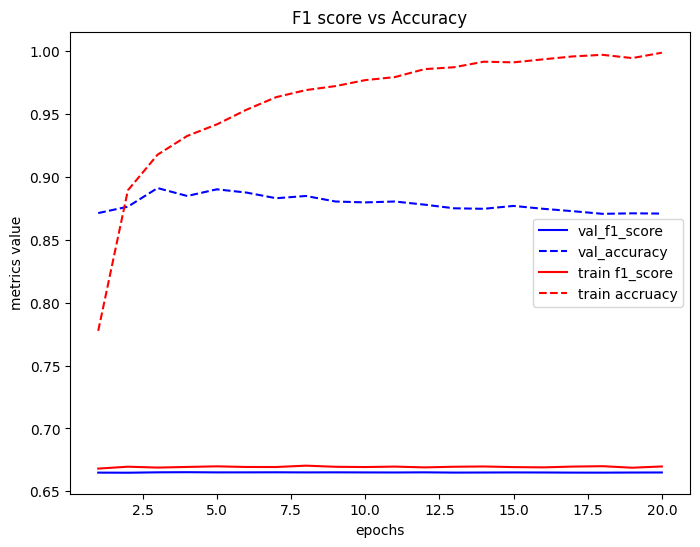

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8, 6))

plt.plot(range(1, 21, 1), history.history['val_f1_score'], '-b', label = 'val_f1_score' )
plt.plot(range(1, 21, 1), history.history['val_accuracy'], '--b', label = 'val_accuracy' )
plt.plot(range(1, 21, 1), history.history['f1_score'], '-r', label = 'train f1_score' )
plt.plot(range(1, 21, 1), history.history['accuracy'], '--r', label = 'train accruacy' )
plt.xlabel("epochs")
plt.ylabel("metrics value")
plt.legend()
plt.title("F1 score vs Accuracy")

plt.show()